In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = load_data()

In [ ]:
x_train.shape

In [ ]:
x_trainN, x_testN = x_train/255, x_test/255

In [ ]:
conv1 = Conv2D( 32, kernel_size=(3,3), strides=1, input_shape=( 28,28,1), padding='same' )
conv2 = Conv2D( 16, kernel_size=(3,3), activation='relu' )
mx = MaxPool2D( pool_size=(2,2) )
c = conv1( x_trainN[0].reshape(1,28,28,1) ) # foward :convolution
c = conv2( c )
c =  mx( c )
c

In [ ]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides=1, 
                  input_shape=( 28,28,1 ), padding='same', activation='relu' ) )
#(input-filter_size)/stride +1
# 28, 28,32
model.add( Conv2D( 16, kernel_size=(3,3), activation='relu' ) ) 
# 26, 26, 16
model.add( MaxPool2D( pool_size=(2,2) ) )
# 13,13,16
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=32, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit( x_trainN.reshape(60000,28,28,1), y_train, epochs=10)

In [11]:
x_testN[0].shape

(28, 28)

In [14]:
model.predict( x_testN[0].reshape(1,28,28,1) ).argmax( axis=1 )

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)

In [5]:
x_train.shape

(60000, 28, 28)

In [ ]:
## 10 분 퀴즈
fashion mnist : test[0] 분류를 예측

In [16]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [17]:
(x_trainF, y_trainF), (x_testF,y_testF) = load_data()

In [18]:
x_trainFN, x_testFN = x_trainF/255, x_testF/255

In [ ]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides=1, 
                  input_shape=( 28,28,1 ), padding='same', activation='relu' ) )
model.add( Conv2D( 16, kernel_size=(3,3), activation='relu' ) ) 
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=32, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit( x_trainFN.reshape(60000,28,28,1), y_trainF, epochs=10)

In [20]:
x_trainFN.shape

(60000, 28, 28)

In [22]:
p = model.predict( x_trainFN.reshape( 60000,28,28,1))
p.argmax(axis=1)

1875/1875 [==============================] - 8s 4ms/step


array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [27]:
c =confusion_matrix( y_trainF, p.argmax(axis=1)  )

In [28]:
 fclass= ["T-shirt/Top","Trouser","Pullover",
 "Dress", "Coat", "Sandal", 
 "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [30]:
import seaborn as sb

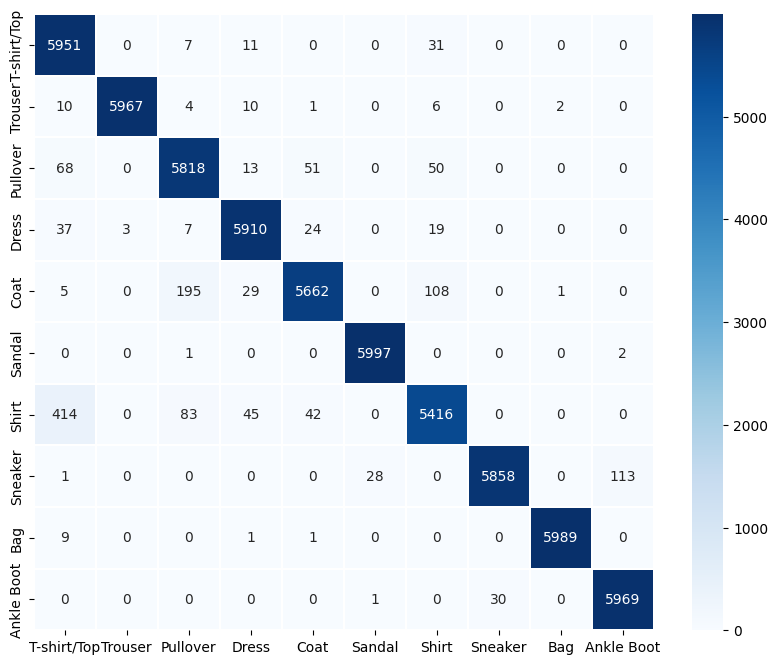

In [31]:
plt.figure( figsize=(10,8))
sb.heatmap( c , annot=True, fmt='d', linewidths=0.2,
        cmap='Blues',yticklabels=fclass, xticklabels=fclass )
plt.show()